In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString, Point
import osmnx  as ox
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
# start
origin =  gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
origin.at[0, 'geometry'] = Point(-4.976962862129585, 34.033348151758226)
origin.at[0, 'name'] = 'Start'

origin

,name,geometry
0,Start,POINT (-4.97696 34.03335)


In [6]:
# End

destination =  gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
destination.at[0, 'geometry'] = Point(-4.95227, 34.04388)
destination.at[0, 'name'] = 'End'
destination

,name,geometry
0,End,POINT (-4.95227 34.04388)


### 1. Function that gives back a plot with specific OSM network type

In [8]:
def osm_map(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe>, network <str> drive, bike, walk
    return map including origins, destinations, and network
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
        
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph, nodes=False)
    
    plt.style.use('seaborn')
    
    # Plot
    ax = edges.plot(figsize=(14, 8), color='gray', linewidth=0.5, alpha=0.7)
    ax = origin.plot(ax=ax, color='red')
    ax = destination.plot(ax=ax, color='blue')
    
    plt.axis('off')
    
    
    return ax

C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = origin.append(destination)
C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: >

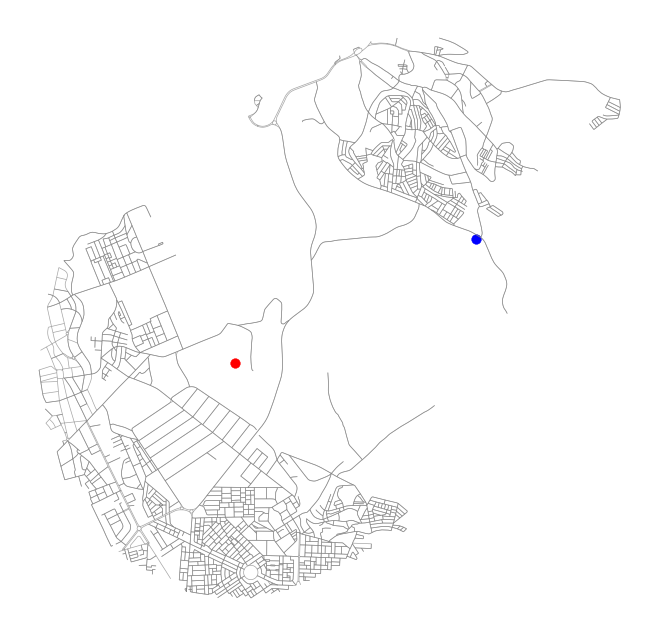

In [9]:
osm_map(origin, destination)
# plt.savefig('drive_network_example.png')

C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = origin.append(destination)
C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: >

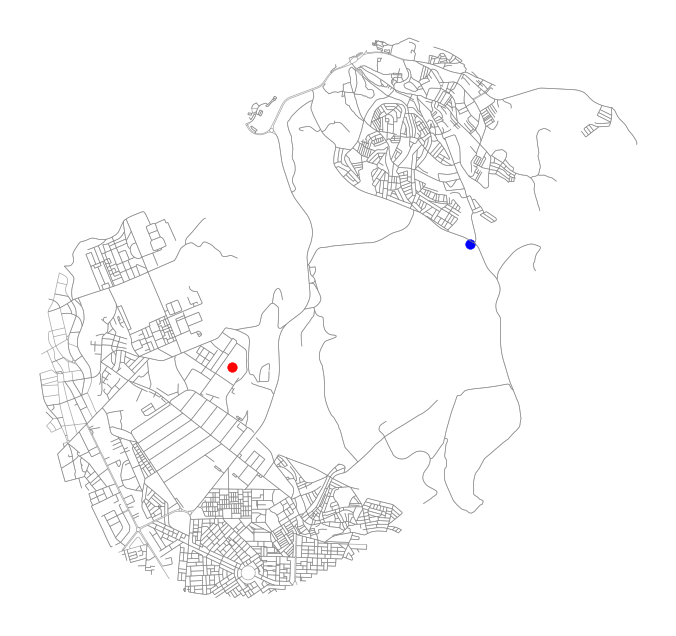

In [10]:
osm_map(origin, destination, 'bike')
# plt.savefig('bike_network_example.png')

C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = origin.append(destination)
C:\Users\bryan\AppData\Local\Temp\ipykernel_15740\844479068.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: >

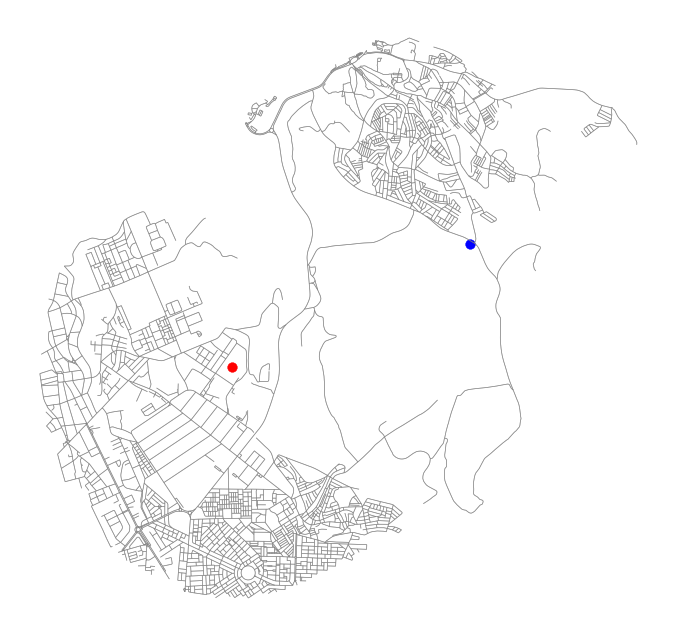

In [11]:
osm_map(origin, destination, 'walk')

### 2. Function that gives back the network as geodataframe

In [15]:
def osm_network(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe>, network <str> drive, bike, or walk
    return network <GeoDataFrame>
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
    
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph, nodes=False)
    
    return edges

In [16]:
drive_gdf = osm_network(origin, destination)
drive_gdf.head()

osmid lanes       highway  oneway reversed  \
u         v          key                                                   
26339991  1373970631 0    123115453     2  unclassified   False    False   
          262474151  0    916412702     3       primary    True    False   
26339994  549305756  0    916412703     2  unclassified   False     True   
          26339991   0    916412702     3       primary    True    False   
256552624 256552894  0    583547810   NaN   residential   False    False   

                           length  \
u         v          key            
26339991  1373970631 0     21.275   
          262474151  0     68.137   
26339994  549305756  0      9.594   
          26339991   0    214.415   
256552624 256552894  0     37.133   

                                                                   geometry  \
u         v          key                                                      
26339991  1373970631 0    LINESTRING (-4.96454 34.05944, -4.96449 34.059...   
          262474151  0    LINESTRING (-4.96454 34.05944, -4.96438 34.059...   
26339994  549305756  0    LINESTRING (-4.96663 34.05863, -4.96671 34.05869)   
          26339991   0    LINESTRING (-4.96663 34.05863, -4.96653 34.058...   
256552624 256552894  0    LINESTRING (-4.97494 34.02034, -4.97493 34.02000)   

                              ref                      name maxspeed junction  \
u         v          key                                                        
26339991  1373970631 0        NaN                       NaN      NaN      NaN   
          262474151  0    RN8;RN6  Boulevard Allal El Fassi       60      NaN   
26339994  549305756  0        NaN                       NaN      NaN      NaN   
          26339991   0    RN8;RN6  Boulevard Allal El Fassi       60      NaN   
256552624 256552894  0        NaN                       NaN      NaN      NaN   

                         bridge  
u         v          key         
26339991  1373970631 0      NaN  
          262474151  0      NaN  
26339994  549305756  0      NaN  
          26339991   0      NaN  
256552624 256552894  0      NaN

In [17]:
drive_gdf = osm_network(origin, destination, 'bike')
# drive_gdf[[ 'geometry']].to_file(r'bike_network_example_updated.geojson', driver='GeoJSON')

In [18]:
type(drive_gdf)

geopandas.geodataframe.GeoDataFrame

In [45]:
# drive_g.to_file('drive_example.shp')

### 3. Function that gives back the shortest path. It can have many origins and destinations

In [29]:
def shortest_path(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe> crs 4326, network <str> drive, bike, walk
    return shortest path <GeoDataFrame>
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
    
    # Reproject the graph
    graph_proj = ox.project_graph(graph)
    
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph_proj, nodes=False)
    
    # Get CRS info UTM
    CRS = edges.crs
    
    # Reproject all data
    origin_proj = origin.to_crs(crs=CRS)
    destination_proj = destination.to_crs(crs=CRS)
    
    # routes of shortest path
    routes = gpd.GeoDataFrame()
    
    # Get nodes from the graph
    nodes = ox.graph_to_gdfs(graph_proj, edges=False)
    
    # Iterate over origins and destinations
    for oidx, orig in origin_proj.iterrows():
        
        # Find closest node from the graph --> point = (latitude, longitude)

        closest_origin_node = ox.nearest_nodes(G=graph_proj, X=orig.geometry.x, Y=orig.geometry.y)
        
        # Iterate over targets
        for tidx, target in destination_proj.iterrows():
            # Find closest node from the graph --> point = (latitude, longitude)

            closest_target_node = ox.nearest_nodes(graph_proj,  X=target.geometry.x, Y=target.geometry.y)

            # Check if origin and target nodes are the same --> if they are --> skip
            if closest_origin_node == closest_target_node:
                print("Same origin and destination node. Skipping ..")
                continue
            
            # Find the shortest path between the points
            route = nx.shortest_path(graph_proj, 
                                     source=closest_origin_node, 
                                     target=closest_target_node, weight='length')
        
            # Extract the nodes of the route
            route_nodes = nodes.loc[route]
        
            # Create a LineString out of the route
            path = LineString(list(route_nodes.geometry.values))
        
            # Append the result into the GeoDataFrame
            routes = routes.append([[path]], ignore_index=True)

    # Add a column name
    routes.columns = ['geometry']        

    # Set geometry
    routes = routes.set_geometry('geometry')
    
    # Set coordinate reference system
    routes.crs = nodes.crs
    
    return routes    

In [30]:
routes = shortest_path(origin, destination, 'drive')
routes.head()

,geometry
0,"LINESTRING (317664.378 3767541.224, 317527.340..."


In [31]:
routes.crs

<Derived Projected CRS: +proj=utm +zone=30 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 4. Function that gives back a plot with the shortest path

In [32]:
def shortest_path_map(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe> crs 4326, network <str> drive, bike, walk
    return map including origins, destinations, shortest path and network
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
    
    # Reproject the graph
    graph_proj = ox.project_graph(graph)
    
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph_proj, nodes=False)
    
    # Get CRS info UTM
    CRS = edges.crs
    
    # Reproject all data
    origin_proj = origin.to_crs(crs=CRS)
    destination_proj = destination.to_crs(crs=CRS)
    
    # routes of shortest path
    routes = gpd.GeoDataFrame()
    
    # Get nodes from the graph
    nodes = ox.graph_to_gdfs(graph_proj, edges=False)
    
    # Iterate over origins and destinations
    for oidx, orig in origin_proj.iterrows():
        
        # Find closest node from the graph --> point = (latitude, longitude)
        closest_origin_node = ox.nearest_nodes(G=graph_proj, Y=orig.geometry.y, X=orig.geometry.x)
        
        # Iterate over targets
        for tidx, target in destination_proj.iterrows():
            # Find closest node from the graph --> point = (latitude, longitude)
            closest_target_node = ox.nearest_nodes(graph_proj, Y=target.geometry.y, X=target.geometry.x)

            # Check if origin and target nodes are the same --> if they are --> skip
            if closest_origin_node == closest_target_node:
                print("Same origin and destination node. Skipping ..")
                continue
            
            # Find the shortest path between the points
            route = nx.shortest_path(graph_proj, 
                                     source=closest_origin_node, 
                                     target=closest_target_node, weight='length')
        
            # Extract the nodes of the route
            route_nodes = nodes.loc[route]
        
            # Create a LineString out of the route
            path = LineString(list(route_nodes.geometry.values))
        
            # Append the result into the GeoDataFrame
            routes = routes.append([[path]], ignore_index=True)

    # Add a column name
    routes.columns = ['geometry']
    
    # Set geometry
    routes = routes.set_geometry('geometry')
        
    # Set coordinate reference system
    routes.crs = nodes.crs

    
    plt.style.use('seaborn')
    
    # Plot
    ax = edges.plot(figsize=(16, 10), color='gray', linewidth=0.5, alpha=0.7)
    ax = origin_proj.plot(ax=ax, color='red')
    ax = destination_proj.plot(ax=ax, color='blue')
    ax = routes.plot(ax=ax, linewidth=3, alpha = 0.8, color = 'magenta')
    
    plt.axis('off')
    
    
    return ax

<AxesSubplot: >

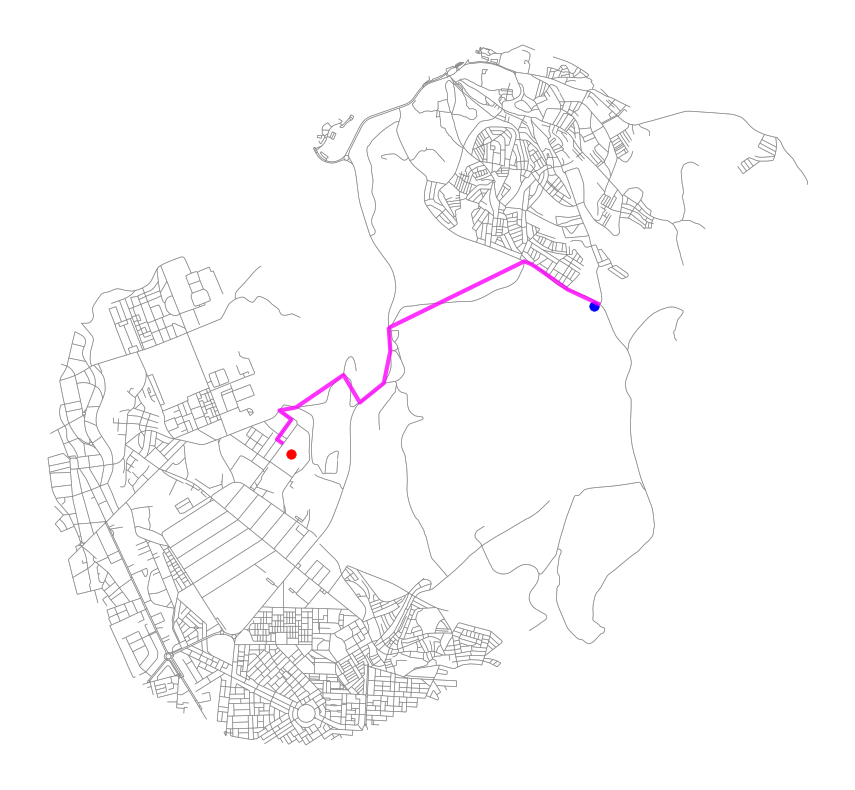

In [33]:
shortest_path_map(origin, destination, 'walk')
# plt.savefig('walking_network.png')

<AxesSubplot: >

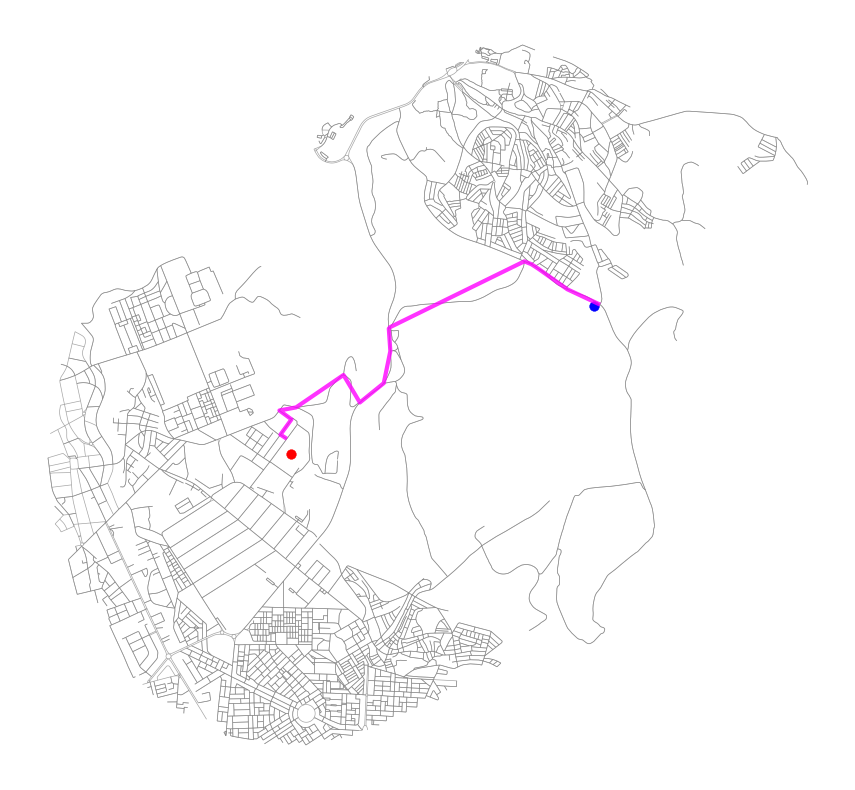

In [34]:
shortest_path_map(origin, destination, 'bike')
# plt.savefig('cycling_network_example_updated.png')

<AxesSubplot: >

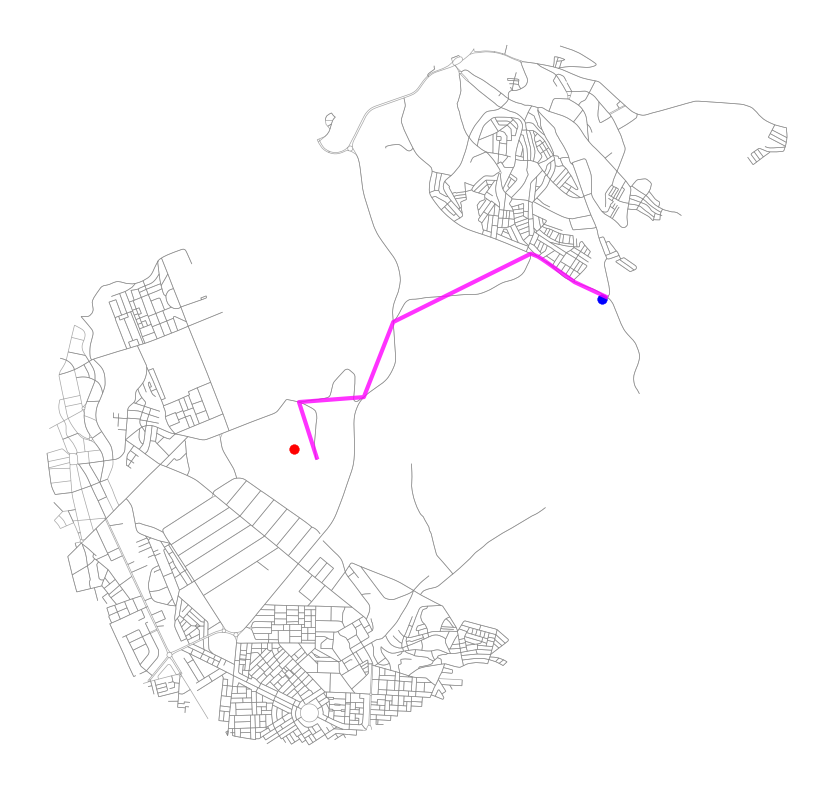

In [36]:
shortest_path_map(origin, destination, 'drive')
# plt.savefig('driving_network_example_updated.png')